<a href="https://colab.research.google.com/github/datenzauberai/tmp/blob/main/dashBootstrapNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dash Einführung
Dash ist ein Framework zur Erstellung von Webapps für die Datenvisualisierung, entwickelt von Plotly. Dash zielt darauf ab, dass der User so weit wie möglich in Python arbeiten kann und eignet sich gut dafür, mit Pandas zusammen verwendet zu werden.

In diesem Notebook werden die Grundlagen von Dash anhand von Beispielen vorgestellt. Die offizielle Dokumentation befindet sich hier: 

https://dash.plotly.com/

*Anmerkung: Damit Dash in der Colab-Umgebung richtig funktioniert, sollten JavaScript und Cookies im Browser erlaubt sein.*

In [2]:
!pip install jupyter-dash dash-bootstrap-components dash_tabulator dash_extensions -q

     |████████████████████████████████| 207 kB 5.1 MB/s 
     |████████████████████████████████| 457 kB 45.5 MB/s 
     |████████████████████████████████| 1.8 MB 41.8 MB/s 
     |████████████████████████████████| 7.3 MB 18.5 MB/s 
     |████████████████████████████████| 23.9 MB 13 kB/s 
     |████████████████████████████████| 357 kB 50.2 MB/s 


In [3]:
import dash
import dash_bootstrap_components as dbc
import dash_tabulator
from dash import dcc
from dash import html
from dash import dash_table
import plotly.express as px
from dash.dependencies import Input, Output
from jupyter_dash import JupyterDash
import pandas as pd

In [4]:
# Daten laden
iris = pd.read_csv('https://raw.githubusercontent.com/thomas-bierhance-exxcellent/data-wrangling-praktikum/master/iris.csv')
vendors = pd.read_csv('https://github.com/thomas-bierhance-exxcellent/data-wrangling-praktikum/raw/master/vendors.csv.xz')
customers = pd.read_csv('https://github.com/thomas-bierhance-exxcellent/data-wrangling-praktikum/raw/master/customers.csv.xz')
locations = pd.read_csv('https://github.com/thomas-bierhance-exxcellent/data-wrangling-praktikum/raw/master/locations.csv.xz')
orders = pd.read_csv('https://github.com/thomas-bierhance-exxcellent/data-wrangling-praktikum/raw/master/orders.csv.xz',
                     parse_dates=['order_accepted_time', 'delivered_time', 'delivery_date'])

## Statische Apps

Mit Dash können sehr aufwändige Oberflächen mit komplexen Diagrammen, Auswahl- und Filterelementen (z.B. Dropdown-Menüs, Checkboxen, Slider, etc.) und Layouts erstellt werden.

Normalerweise wird Dash als normales Pythonskript ausgeführt, der Zugriff auf die erzeugte Visualisierung erfolgt über den Browser. Innerhalb dieses Notebooks/der Colab-Umgebung greifen wir aber auf **JupyterDash** zurück, damit die Oberflächen inline angezeigt werden können:

(https://medium.com/plotly/introducing-jupyterdash-811f1f57c02e)

In der Praxis könntet ihr eine Dash-App sehr einfach in einen Container packen und zum Beispiel in einem Kubernetes-Cluster laufen lassen.

Für den Anfang erstmal eine minimale (Jupyter-)Dash-Anwendung:

In [ ]:
app = JupyterDash(__name__)

# Das Layout wird ähnlich wie in HTML festgelegt
app.layout = html.Div(children=[
    html.H1(children='Hallo'),
    html.Div(children='Das ist Deine erste Dash-App.')
])

# Die JupyterDash-App wird im Notebook selber angezeigt
app.run_server(mode='inline')

Zum Vergleich dieselbe Anwendung in "normalem" Dash. Der Code unterscheidet sich in diesem Beispiel nur in zwei Punkten: Die Erstellung des Dash-Objektes, und der run-Befehl.

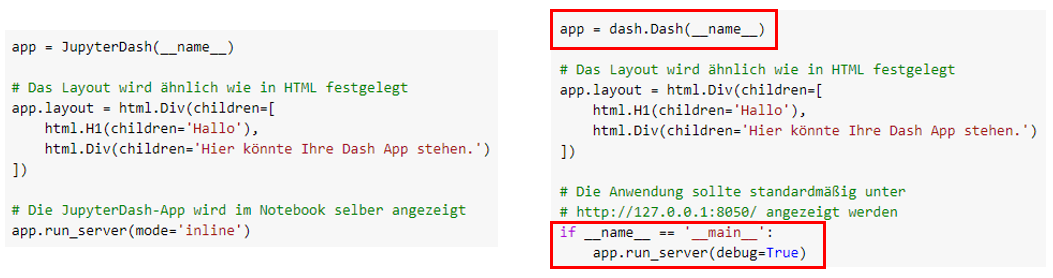

Für das Layout verwenden wir in diesem Notebook **Dash Bootstrap** (https://dash-bootstrap-components.opensource.faculty.ai/). Dies ändert nichts an den Konzepten von Dash, macht den Layout-Code bei etwas komplexeren Beispielen aber deutlich übersichtlicher.

In [ ]:
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])


# Das Layout wird ähnlich wie in HTML festgelegt
# Der dbc.Container ist ein Dash-Bootstrap Element
app.layout = app.layout = dbc.Container([
     html.H1('Hallo'),
     html.Div('Das ist Deine erste Dash-Bootstrap-App.')
])

# Die JupyterDash-App wird im Notebook selber angezeigt
app.run_server(mode='inline')

Wir setzen jetzt einen der Iris-Plots aus dem Pandas-Notebook in Dash um. Hierfür verwenden wir das `plotly.express` Modul, oben importiert als `px`. Es ermöglicht die Erstellung interaktiver Diagramme im Browser (Matplotlib dagegen erzeugt nur statische Diagramme): https://plotly.com/python/plotly-express/

Tooltips für die einzelnen Datenpunkte werden durch Plotly automatisch generiert, ebenso wie Legenden und eine Plot-Toolbar mit Auswahl- und Zoomwerkzeugen (die Ansicht kann mit dem "Autoscale"-Button zurückgesetzt werden). Diese interaktiven Diagramme lassen sich ganz normal im Jupyter-Notebook nutzen.

In [ ]:
px.scatter(iris, x='sepal_length', y='sepal_width', color='species')

Die Diagramme können auch in die Dash-Anwendung mit der Komponente `dcc.Graph` eingebunden werden.

In [ ]:
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
# Scatterplot erzeugen
fig = px.scatter(iris, x='sepal_length', y='sepal_width', color='species')

app.layout = dbc.Container(
    [
        html.H1('Iris Data'),
        dcc.Graph(id='iris-graph', figure=fig)
    ]
)

app.run_server(mode='inline')

Auch 3D-Plots können ohne großen Aufwand erstellt werden:

In [ ]:
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
# Die Dimension 'petal_length' wird nun hinzugefügt
fig = px.scatter_3d(iris, x='sepal_length', y='sepal_width', z='petal_width', color='species')

app.layout = dbc.Container(
    [
        html.H1('Iris Data'),
        dcc.Graph(id='iris-graph', figure=fig)
    ]
)

app.run_server(mode='inline')

### Übung

Jetzt zu den Aufgaben für Dich:

1.   Erstelle aus den Restaurant-Daten einen neuen DataFrame mit den Spalten `delivery_date`, `grand_total_sum` und `grand_total_mean`. `grand_total_sum` ist der Gesamtumsatz aller Restaurants zum jeweiligen Datum, `grand_total_mean` der durchschnittliche Umsatz je Bestellung.
2.    Erstelle einen einfachen Dash-Plot mit obigem DataFrame, mit dem Datum auf der x-Achse und dem Gesamtumsatz auf der y-Achse. Hinweis: `px.line(df, x = 'col_x', y='col_y')`








In [ ]:
# Platz für Deine Übungen :)

### Lösung

In [8]:
# 1. DataFrame erstellen
restaurant_df = orders[['delivery_date', 'grand_total']].groupby('delivery_date').agg(grand_total_sum=('grand_total', 'sum'), grand_total_mean=('grand_total', 'mean')).reset_index()
restaurant_df.head()

,delivery_date,grand_total_sum,grand_total_mean
0,2019-05-31,833.6,18.524444
1,2019-06-01,3903.3,19.228079
2,2019-06-02,3168.1,17.124865
3,2019-06-03,3048.1,16.933889
4,2019-06-04,4208.4,17.107317


In [ ]:
# 2. Dash-Plot erstellen
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
# Zur Abwechslung mal einen Line-Plot
fig = px.line(restaurant_df, x = 'delivery_date', y='grand_total_sum')

app.layout = dbc.Container(
    [
        html.H1('Restaurant Data'),
        dcc.Graph(id='restaurant-graph', figure=fig)
    ]
)

app.run_server(mode='inline')

## Interaktive Apps mit Callbacks
Ein höherer Grad an Interaktion wird in Dash über Callbacks erreicht. Mit Callbacks kann auf Userinputs reagiert werden, um zum Beispiel bei der Auswahl in einer Dropdown-Komponente eine andere UI-Komponenten wie ein Diagramme anzupassen. Auch hierzu wieder ein Minimalbeispiel:

In [ ]:
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Für Callbacks sind die component_ids im Layout wichtig
app.layout = dbc.Container(
    [
     html.H6('Mit dem Inputfeld kann der Text im Output verändert werden'),
     dbc.Input(id='my-input', type='text', value='...'),
     html.Br(),
     html.Div('Output: '),
     html.Div(id='my-output', children='...')
    ]
)

# Der Callback wird immer aufgerufen, sobald sich eine Property des Inputs ändert,
# in diesem Fall mit component_id='my-input' im Layout 
# Der Output wird analog über component_id='my-output' angesprochen
@app.callback(
    Output(component_id='my-output', component_property='children'),
    Input(component_id='my-input', component_property='value')
)
def update_output_div(input_value):
    return input_value


app.run_server(mode='inline')

Callbacks werden in Dash mit `@app.callback` und den Output- und Inputparametern annotiert. Die Annotation verknüpft die Callbackfunktion über ID- und Property-Werte mit den entsprechenden Elementen, die im Layout spezifiziert sind. Alle Callbacks werden beim Start der Anwendung einmal ausgeführt, um Elemente initial einzurichten.

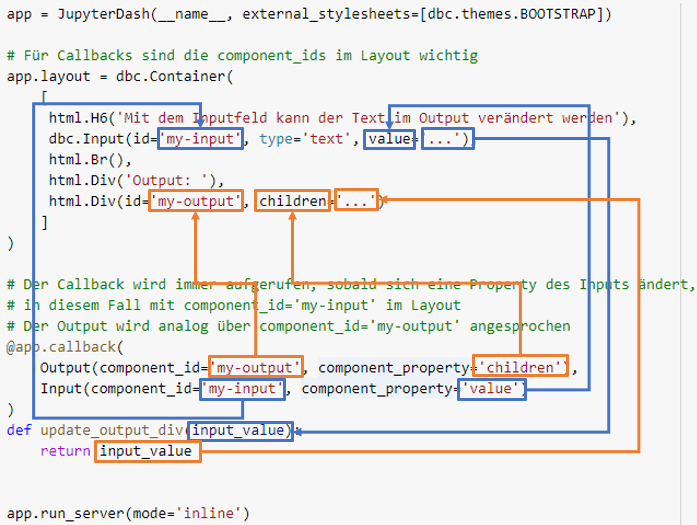

Über Properties werden die Attribute der Layout-Elemente spezifiziert, die für die Callback-Funktion relevant sind. Im Output können auch mehrere Attribute gleichzeitig verändert werden, ein Beispiel hierzu kommt in der DataTable-Sektion am Ende des Notebooks.

Das Input-Feld in diesem Beispiel ist Teil der Dash Core Components (https://dash.plotly.com/dash-core-components), ebenso wie `dcc.Graph `, welcher uns in den vorherigen Beispielen bereits begegnet ist.

Mithilfe von Callbacks bauen wir nun in die Iris-App eine einfache Filtermöglichkeit ein: Ein Dropdown-Menü (ebenfalls aus `dcc`), mit welchem Iris-Spezies ausgewählt werden können.

*Anmerkung: In diesem Beispiel sind die Farben nicht an die Spezies gebunden, d.h. wenn nur eine Spezies ausgewählt wird, wird diese immer in Blau angezeigt. Um den Code halbwegs übersichtlich zu halten, belassen wir das in diesem Notebook so. Das Festlegen der Farben für Daten ist aber ebenfalls möglich: https://plotly.com/python/discrete-color/#directly-mapping-colors-to-data-values*

In [ ]:
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = dbc.Container([
     html.H1('Iris Data'),
     dcc.Dropdown(id='species-select', 
                  options=[{'label': i, 'value': i} for i in iris['species'].unique()], 
                  value=None),
     dcc.Graph(id='iris-graph', figure=None) # figure hier None, weil das Diagramm durch den initialen Callback-Aufruf erzeugt wird
])

# Der Callback wird aufgerufen sobald, sich eine Input-Property ändert
@app.callback(
    Output(component_id='iris-graph', component_property='figure'),
    Input(component_id='species-select', component_property='value')
)
def update_graph(species_select):
  # Falls keine einzelne Spezies ausgewählt ist, alle anzeigen
  if not species_select:
    iris_updated = iris
  else:
    iris_updated = iris.loc[iris['species']==species_select]
  return px.scatter(iris_updated, x='sepal_length', y='sepal_width', color='species')

app.run_server(mode='inline')

### Mehrere Inputs
Nur nach der Spezies zu filtern reicht vielleicht nicht, deshalb wollen wir zusätzlich nach Kelchblattgröße filtern können. Zur Abwechslung verwenden wir hierzu Slider-Elemente.

Für die Anordnung der Komponenten können wir das Grid-Layout nutzen, das mit Reihen (`dbc.Row`) und Spalten (`dbc.Col`) arbeitet. 

(https://dash-bootstrap-components.opensource.faculty.ai/docs/components/layout)

In [ ]:
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = dbc.Container([
      html.H1('Iris Data'),
      dbc.Row([
               dbc.Label('Species:', width=4),
               dbc.Label('Sepal length:', width=4),
               dbc.Label('Sepal width:', width=4),
      ]),
      dbc.Row([
               dbc.Col(dcc.Dropdown(id='species-select', options=[{'label': i, 'value': i} for i in iris['species'].unique()], value=None), width=4),
               dbc.Col(dcc.RangeSlider(id='sepal-length-select', count=1,min=4,max=8,step=0.5, value=[4,8], marks={i: '{}'.format(i) for i in range(4,9)}), width=4),
               dbc.Col(dcc.RangeSlider(id='sepal-width-select', count=1,min=2,max=5,step=0.5, value=[2, 5], marks={i: '{}'.format(i) for i in range(2, 6)}), width=4)
      ]),
      dcc.Graph(id='iris-graph', figure=None)
])

# Die Inputs werden jetzt als Liste in die Annotation geschrieben, kommen
# aber als einzelne Parameter in der Callback-Methode update_graph an
@app.callback(
    Output(component_id='iris-graph', component_property='figure'),
    [Input(component_id='species-select', component_property='value'),
     Input(component_id='sepal-length-select', component_property='value'),
     Input(component_id='sepal-width-select', component_property='value')]
)
def update_graph(species_select, sepal_length_select, sepal_width_select):
  # Spezies filtern
  if not species_select:
    iris_updated = iris
  else:
    iris_updated = iris.loc[iris['species']==species_select]
  # Sliderwerte filtern
  iris_updated = iris_updated.loc[iris_updated['sepal_length'].between(sepal_length_select[0],sepal_length_select[1])]
  iris_updated = iris_updated.loc[iris_updated['sepal_width'].between(sepal_width_select[0],sepal_width_select[1])]
  return px.scatter(iris_updated, x='sepal_length', y='sepal_width', color='species')

app.run_server(mode='inline')

### Übung
Jetzt zu den Aufgaben für Dich:
1.  Füge zum Restaurant-Plot ein Dropdown-Menü hinzu, so dass die Anzeige auf der y-Achse zwischen dem Gesamtumsatz und dem durchschnittlichen Umsatz gewechselt werden kann.
2. Füge ein Dropdown-Menü hinzu mit dem zusätzlich nach dem Restaurant-Typ ('vendor_category_en') gefiltert werden kann. Tipp: Du musst dafür zusätzliche Daten "joinen".

In [ ]:
# Platz für Deine Übungen :)

### Lösung

In [11]:
restaurant_df = orders[['delivery_date', 'grand_total']].groupby('delivery_date').agg(grand_total_sum=('grand_total', 'sum'), grand_total_mean=('grand_total', 'mean')).reset_index()

In [ ]:
# 1. Dropdown-Menü
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = dbc.Container([
                            html.H1('Restaurant Data'),
                            dcc.Dropdown(id='value-select',
                                         options=[{'label': i, 'value': i} for i in ['grand_total_sum', 'grand_total_mean']],
                                         value='grand_total_sum',
                                         # clearable=False sorgt dafür, dass immer einer der Werte ausgewählt sein muss
                                         clearable=False),
                            dcc.Graph(id='restaurant-graph', figure=None)
])

@app.callback(
    Output(component_id='restaurant-graph', component_property='figure'),
    Input(component_id='value-select', component_property='value')
)
def update_graph(value_select):
  return px.line(restaurant_df, x = 'delivery_date', y=value_select)

app.run_server(mode='inline')

In [ ]:
# 2. Zusätzlicher Filter

def generate_graph(value_select, vendor_category_select):
  df = orders.merge(vendors, on='vendor_id')[['delivery_date', 'grand_total', 'vendor_category_en']]
  if vendor_category_select:
    df = df.loc[df['vendor_category_en']==vendor_category_select]
  df = df.groupby('delivery_date').agg(grand_total_sum=('grand_total', 'sum'), grand_total_mean=('grand_total', 'mean')).reset_index()
  return px.line(df, x = 'delivery_date', y=value_select)

generate_graph('grand_total_mean', 'Sweets & Bakes')

In [ ]:
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = dbc.Container([
                            html.H1('Restaurant Data'),
                            dbc.Row([
                                dbc.Col([
                                                dbc.Label('Value select'),
                                                dcc.Dropdown(id='value-select',
                                                             options=[{'label': i, 'value': i} for i in ['grand_total_sum', 'grand_total_mean']],
                                                             value='grand_total_sum',
                                                             clearable=False)], width=6),
                                dbc.Col([dbc.Label('Vendor category'),
                                                dcc.Dropdown(id='vendor-category-select',
                                                             options=[{'label': i, 'value': i} for i in vendors['vendor_category_en'].unique()],
                                                             value=None)], width=6)
                            ]),
                            dbc.Col(dcc.Graph(id='restaurant-graph', figure=None), width=12)
])

@app.callback(
    Output(component_id='restaurant-graph', component_property='figure'),
    [Input(component_id='value-select', component_property='value'),
     Input(component_id='vendor-category-select', component_property='value')]
)
def update_graph(value_select, vendor_category_select):
  return generate_graph(value_select, vendor_category_select)

app.run_server(mode='inline')

<IPython.core.display.Javascript object>

## DataTable
Für tiefergehende Datenanalyse kann in einer Dash-Anwendung natürlich auch mehr als nur Diagramme angezeigt werden. Dash hat dafür die Komponente [DataTables](https://dash.plotly.com/datatable). Wir nutzen aber eine alternative Komponente, die auf [Tabulator](http://tabulator.info/) basiert und ein wenig schöneres Styling mitbringt als die Standardkomponente: [dash-tabulator](https://github.com/preftech/dash-tabulator)

Als Beispiel stellen wir die Iris-Daten in einer Tabelle dar:

In [ ]:
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout =  dash_tabulator.DashTabulator(
    id='tabulator',
    theme='bootstrap/tabulator_bootstrap4',
    columns=[{ "title": col, "field": col} for col in iris.columns],
    options = { 'pagination': 'local', 'paginationSize': 5},
    data=iris.to_dict(orient='records')
)

app.run_server(mode='inline')

Im letzten Schritt werden wir nun eine Iris-Datatable erstellen, mit der eine Spezies ausgewählt und zusätzliche Informationen zu ihr angezeigt werden können.

In [ ]:
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

iris_info = pd.DataFrame({'species': ['species-setosa','species-versicolor','species-virginica', ],
                          'taxa_named_by': ['Peter Simon Pallas', 'Carl Linnaeus', 'Carl Linnaeus'],
                          'synonym': ['Iris arctica', 'Iris pulchella', 'Iris caroliniana']})

app.layout = dbc.Container([
      html.H1('Iris DataTables'),

      dbc.Label('Species data selector:'),
      dash_tabulator.DashTabulator(
          id='species-select-table',
          theme='bootstrap/tabulator_bootstrap4',
          options = { 'selectable': 1},
          columns=[{ "title": col, "field": col} for col in iris_info.columns],
          data=iris_info.to_dict(orient='records')
      ),
      html.Br(),
      dbc.Label('Species data:'),
      dash_tabulator.DashTabulator(
          id='flowers',
          theme='bootstrap/tabulator_bootstrap4',
          columns=[{ "title": col, "field": col} for col in iris.columns],
          options = { 'pagination': 'local', 'paginationSize': 5},
          data=iris.to_dict(orient='records')
      ),
      html.Div(id='debug', children='...')
])

@app.callback(
    Output('flowers', 'data'),
    Input('species-select-table', 'rowClicked')
)
def row_clicked(row):
  if not row:
    data = iris
  else:
    data = iris.loc[iris['species']==row['species']]
  return data.to_dict(orient='records')

app.run_server(mode='inline')

### Übung
Jetzt zu den Aufgaben für Dich:
1.  Erstelle zwei DataTables: In der ersten sollen Kundendaten gelistet werden, und zwar die `customer_id`, und die Summe aller Zahlungen des entsprechenden Kunden (`grand_total`). Die Zeilen dieser DataTable sollen selektierbar sein. Wird ein Kundeneintrag selektiert, sollen in der zweiten DataTable alle Bestellungen des entsprechenden Kunden gelistet werden.



In [ ]:
# Platz für Deine Übungen :)

### Lösung

In [ ]:
restaurant_df = orders[['delivery_date', 'grand_total']].groupby('delivery_date').agg(revenue=('grand_total', 'sum'), total_orders=('grand_total', 'count')).reset_index()

In [ ]:
# 1. Kunden-Liste
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# In dieser Funktion wird der DataFrame für die erste Tabelle erzeugt
def filter_customer_df():
  customers_df = orders[['customer_id', 'grand_total']]
  # Durch sum() werden die Customer-IDs zu Indizes, wir wollen sie aber als Spalte;
  # reset_index() macht genau das
  customers_df = customers_df.groupby('customer_id').sum().reset_index()
  # Die Geldbeträge enthalten stellenweise sehr viele Nachkommastellen -> Runden
  customers_df['grand_total'] = customers_df['grand_total'].apply(lambda x: round(x, 2))
  return customers_df

customers_df = filter_customer_df()


# Die Kunden-Auswahl-Tabelle
customer_controls = dbc.Card([
                                
])

app.layout = dbc.Container([
                            html.H1('Customer Data'),
                                           dbc.Label('Customers:'),
                                           dash_table.DataTable(
                                               id='customer-table',
                                               columns=[{'name': i, 'id': i} for i in customers_df.columns],
                                               data=customers_df.to_dict('records'),
                                               row_selectable='single',
                                               style_table = {'overflowY': 'auto'},
                                               page_action = 'native',
                                               page_size = 10,
                                               # Die css Einstellung verhindert, dass die DataTable an den Rändern abgeschnitten wird
                                               css=[{'selector': '.row', 'rule': 'margin: 0'}]
                                            ),
                                           dbc.Label('', id='orders-label'),
                                           html.Br(),
                                           dash_table.DataTable(
                                               id='orders-table',
                                               columns=[{'name': i, 'id': i} for i in orders.columns],
                                               data=orders.to_dict('records'),
                                               style_table = {'overflowY': 'auto'},
                                               page_action = 'native',
                                               page_size = 10,
                                               css=[{'selector': '.row', 'rule': 'margin: 0'}]
                                            )
])

@app.callback(
    Output(component_id='orders-label', component_property='children'),
    Output(component_id='orders-table', component_property='data'),
    [Input(component_id='customer-table', component_property='selected_rows')]
)
def update_orders_table(selected_rows):
  if not selected_rows:
    customer_id = customers_df['customer_id'][0]
  else:
    customer_id = customers_df['customer_id'][selected_rows[0]]
  label_string = 'Orders for customer {}:'.format(customer_id)
  orders_updated = orders[orders['customer_id'] == customer_id].to_dict('records')
  return label_string, orders_updated

app.run_server(mode='inline')

<IPython.core.display.Javascript object>

## Weiterführende Ressourcen

*  Dash Gallery (Umfangreiche Beispielsammlung für Dash-Apps, inkl. Source-Code): https://dash-gallery.plotly.host/Portal/

* lokale Python-Umgebung: Anaconda (https://www.anaconda.com/products/individual#Downloads)
* lokale Python-IDE: VSCode (https://code.visualstudio.com/)
* Zugriff auf Datenbanken: SQLAlchemy (conda install sqlalchemy), (https://www.sqlalchemy.org/)
